In [3]:
import pandas as pd
import numpy as np
import nltk
import re
import seaborn as sns
from bs4 import BeautifulSoup

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /Users/jugal13/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jugal13/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jugal13/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Dataset:
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Beauty_v1_00.tsv.gz

## Read Data

In [4]:
dataset = "amazon_reviews_us_Office_Products_v1_00.tsv"

original_df = pd.read_csv(dataset, sep="\t", on_bad_lines="skip", low_memory=False)

print(original_df.head(3))

  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     43081963  R18RVCKGH1SSI9  B001BM2MAC       307809868   
1          US     10951564  R3L4L6LW1PUOFY  B00DZYEXPQ        75004341   
2          US     21143145  R2J8AWXWTDX2TF  B00RTMUHDW       529689027   

                                       product_title product_category  \
0     Scotch Cushion Wrap 7961, 12 Inches x 100 Feet  Office Products   
1          Dust-Off Compressed Gas Duster, Pack of 4  Office Products   
2  Amram Tagger Standard Tag Attaching Tagging Gu...  Office Products   

  star_rating  helpful_votes  total_votes vine verified_purchase  \
0           5            0.0          0.0    N                 Y   
1           5            0.0          1.0    N                 Y   
2           5            0.0          0.0    N                 Y   

                                     review_headline  \
0                                         Five Stars   
1  Phffffffft, Phfffffft.

In [5]:
original_df.head(3)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,43081963,R18RVCKGH1SSI9,B001BM2MAC,307809868,"Scotch Cushion Wrap 7961, 12 Inches x 100 Feet",Office Products,5,0.0,0.0,N,Y,Five Stars,Great product.,2015-08-31
1,US,10951564,R3L4L6LW1PUOFY,B00DZYEXPQ,75004341,"Dust-Off Compressed Gas Duster, Pack of 4",Office Products,5,0.0,1.0,N,Y,"Phffffffft, Phfffffft. Lots of air, and it's C...",What's to say about this commodity item except...,2015-08-31
2,US,21143145,R2J8AWXWTDX2TF,B00RTMUHDW,529689027,Amram Tagger Standard Tag Attaching Tagging Gu...,Office Products,5,0.0,0.0,N,Y,but I am sure I will like it.,"Haven't used yet, but I am sure I will like it.",2015-08-31


## Keep Reviews and Ratings

In [6]:
original_df = original_df.dropna(subset="review_headline")
original_df = original_df.dropna(subset="review_body")

original_df["review_text"] = original_df["review_headline"] + " " + original_df["review_body"]

columns = ["star_rating", "review_text"]

filtered_column_df = original_df[columns]

filtered_column_df.loc[:,("star_rating")] = pd.to_numeric(filtered_column_df["star_rating"], errors='coerce')

filtered_column_df = filtered_column_df.dropna(subset=["star_rating"])
filtered_column_df = filtered_column_df.dropna(subset=["review_text"])

In [7]:
filtered_column_df.head(3)

,star_rating,review_text
0,5,Five Stars Great product.
1,5,"Phffffffft, Phfffffft. Lots of air, and it's C..."
2,5,but I am sure I will like it. Haven't used yet...


star_rating
1     306962
2     138380
3     193674
4     418339
5    1582682
Name: count, dtype: int64


<Axes: xlabel='star_rating', ylabel='count'>

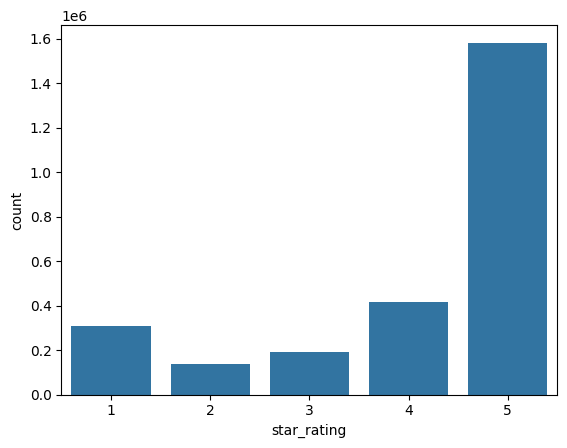

In [8]:
ratings_frequency = filtered_column_df["star_rating"].value_counts().sort_index()

print(ratings_frequency)

sns.barplot(ratings_frequency)

 ## We form three classes and select 20000 reviews randomly from each class.



In [9]:
# Setting the sentinment for neutral reviews
filtered_column_df["sentiment_score"] = np.NaN

# Setting the sentiment for positive reviews
filtered_column_df.loc[filtered_column_df["star_rating"] > 3, "sentiment_score"] = 1

# Setting the sentinment for negative reviews
filtered_column_df.loc[filtered_column_df["star_rating"] < 3, "sentiment_score"] = 0

In [10]:
#
print("Number of neutral reviews: ", len(filtered_column_df.loc[filtered_column_df["star_rating"] == 3]))
print("Number of positive reviews: ", len(filtered_column_df.loc[filtered_column_df["sentiment_score"] == 1]))
print("Number of negative reviews: ", len(filtered_column_df.loc[filtered_column_df["sentiment_score"] == 0]))

Number of neutral reviews:  193674
Number of positive reviews:  2001021
Number of negative reviews:  445342


In [11]:
# Dropping neutral reviews
filtered_column_df = filtered_column_df.dropna(subset=["sentiment_score"])

filtered_column_df.head()

,star_rating,review_text,sentiment_score
0,5,Five Stars Great product.,1.0
1,5,"Phffffffft, Phfffffft. Lots of air, and it's C...",1.0
2,5,but I am sure I will like it. Haven't used yet...,1.0
3,1,and the shredder was dirty and the bin was par...,0.0
4,4,Four Stars Gorgeous colors and easy to use,1.0


In [12]:
print("Number of reviews: ", filtered_column_df.shape[0])

Number of reviews:  2446363


In [13]:
df1 = filtered_column_df.loc[filtered_column_df["sentiment_score"] == 1]
df2 = filtered_column_df.loc[filtered_column_df["sentiment_score"] == 0]

df1 = df1[:100000]
df2 = df2[:100000]

df = pd.concat([df1, df2], ignore_index=True)

df = df.sort_index()
df.head()

,star_rating,review_text,sentiment_score
0,5,Five Stars Great product.,1.0
1,5,"Phffffffft, Phfffffft. Lots of air, and it's C...",1.0
2,5,but I am sure I will like it. Haven't used yet...,1.0
3,4,Four Stars Gorgeous colors and easy to use,1.0
4,5,Five Stars Perfect for planning weekly meals. ...,1.0


# Data Cleaning



In [14]:
print("Before cleaning")
print("Average Length of a review: ", df["review_text"].apply(len).mean())

Before cleaning
Average Length of a review:  221.387815


In [15]:
# Transform string to lower case
df["review_text"] = df["review_text"].str.lower()

# Remove html tags
df["review_text"] = df["review_text"].apply(lambda x: BeautifulSoup(x).get_text())

# Remove urls
df["review_text"] = df["review_text"].apply(lambda x: re.sub('http[s]?://\S+', '', x))

# remove any non-alphabetic charcters
df["review_text"] = df["review_text"].apply(lambda x: re.sub(r'[^a-z\s]+', '', x))

# remove any extra spaces
df["review_text"] = df["review_text"].apply(lambda x: re.sub(r' +', ' ', x))

/var/folders/g9/r7hfr6xs6gd6cg8z55mvvqnh0000gn/T/ipykernel_96452/2174142748.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df["review_text"] = df["review_text"].apply(lambda x: BeautifulSoup(x).get_text())


In [16]:
contractions = {
    re.compile(r"\bain't\b", re.I | re.U): "are not",
    re.compile(r"\ba'ight\b", re.I | re.U): "alright",
    re.compile(r"\bamn't\b", re.I | re.U): "am not",
    re.compile(r"\bn\b", re.I | re.U): "and",
    re.compile(r"\barencha\b", re.I | re.U): "are not you",
    re.compile(r"\baren't\b", re.I | re.U): "are not",
    re.compile(r"\b'bout\b", re.I | re.U): "about",
    re.compile(r"\bcan't\b", re.I | re.U): "cannot",
    re.compile(r"\bcap'n\b", re.I | re.U): "captain",
    re.compile(r"\bcause\b", re.I | re.U): "because",
    re.compile(r"\bcuz\b", re.I | re.U): "because",
    re.compile(r"\bcept\b", re.I | re.U): "except",
    re.compile(r"\bc'mon\b", re.I | re.U): "come on",
    re.compile(r"\bcould've\b", re.I | re.U): "could have",
    re.compile(r"\bcouldn't\b", re.I | re.U): "could not",
    re.compile(r"\bcouldn't've\b", re.I | re.U): "could not have",
    re.compile(r"\bcuppa\b", re.I | re.U): "cup of",
    re.compile(r"\bdaren't\b", re.I | re.U): "dare not",
    re.compile(r"\bdaresn't\b", re.I | re.U): "dare not",
    re.compile(r"\bdasn't\b", re.I | re.U): "dare not",
    re.compile(r"\bdidn't\b", re.I | re.U): "did not",
    re.compile(r"\bdoesn't\b", re.I | re.U): "does not",
    re.compile(r"\bdon't\b", re.I | re.U): "do not",
    re.compile(r"\bdunno\b", re.I | re.U): "do not know",
    re.compile(r"\bd'ya\b", re.I | re.U): "did you",
    re.compile(r"\be'en\b", re.I | re.U): "even",
    re.compile(r"\be'er\b", re.I | re.U): "ever",
    re.compile(r"\beverybody's\b", re.I | re.U): "everybody is",
    re.compile(r"\beveryone's\b", re.I | re.U): "everyone is",
    re.compile(r"\beverything's\b", re.I | re.U): "everything is",
    re.compile(r"\b'em\b", re.I | re.U): "them",
    re.compile(r"\bfinna\b", re.I | re.U): "fixing to",
    re.compile(r"\bfo'c'sle\b", re.I | re.U): "forecastle",
    re.compile(r"\bgainst\b", re.I | re.U): "against",
    re.compile(r"\bg'day\b", re.I | re.U): "good day",
    re.compile(r"\bgimme\b", re.I | re.U): "give me",
    re.compile(r"\bgiv'n\b", re.I | re.U): "given",
    re.compile(r"\bgi'z\b", re.I | re.U): "give us",
    re.compile(r"\bgonna\b", re.I | re.U): "going to",
    re.compile(r"\bgon't\b", re.I | re.U): "go not",
    re.compile(r"\bgotta\b", re.I | re.U): "got to",
    re.compile(r"\bhadn't\b", re.I | re.U): "had not",
    re.compile(r"\bhad've\b", re.I | re.U): "had have",
    re.compile(r"\bhasn't\b", re.I | re.U): "has not",
    re.compile(r"\bhaven't\b", re.I | re.U): "have not",
    re.compile(r"\bhelluva\b", re.I | re.U): "hell of a",
    re.compile(r"\bhe'd\b", re.I | re.U): "he would",
    re.compile(r"\bhe'll\b", re.I | re.U): "he will",
    re.compile(r"\bhe's\b", re.I | re.U): "he is",
    re.compile(r"\byes'nt\b", re.I | re.U): "no",
    re.compile(r"\bhow'd\b", re.I | re.U): "how did",
    re.compile(r"\bhere's\b", re.I | re.U): "here is",
    re.compile(r"\bhowdy\b", re.I | re.U): "how do you do",
    re.compile(r"\bhow'll\b", re.I | re.U): "how will",
    re.compile(r"\bhow're\b", re.I | re.U): "how are",
    re.compile(r"\bI'd've\b", re.I | re.U): "I would have",
    re.compile(r"\bI'd'nt\b", re.I | re.U): "I would not",
    re.compile(r"\bI'd'nt've\b", re.I | re.U): "I would not have",
    re.compile(r"\bIf'n\b", re.I | re.U): "If and when",
    re.compile(r"\bI'm\b", re.I | re.U): "I am",
    re.compile(r"\bImma\b", re.I | re.U): "I am going to",
    re.compile(r"\bI'm'o\b", re.I | re.U): "I am going to",
    re.compile(r"\binnit\b", re.I | re.U): "is it not",
    re.compile(r"\bIon\b", re.I | re.U): "I do not",
    re.compile(r"\bI've\b", re.I | re.U): "I have",
    re.compile(r"\bisn't\b", re.I | re.U): "is not",
    re.compile(r"\bit'd\b", re.I | re.U): "it would",
    re.compile(r"\bIdunno\b", re.I | re.U): "I do not know",
    re.compile(r"\bkinda\b", re.I | re.U): "kind of",
    re.compile(r"\blet's\b", re.I | re.U): "let us",
    re.compile(r"\bloven't\b", re.I | re.U): "love not",
    re.compile(r"\bma'am\b", re.I | re.U): "madam",
    re.compile(r"\bmayn't\b", re.I | re.U): "may not",
    re.compile(r"\bmay've\b", re.I | re.U): "may have",
    re.compile(r"\bmethinks\b", re.I | re.U): "I think",
    re.compile(r"\bmightn't\b", re.I | re.U): "might not",
    re.compile(r"\bmight've\b", re.I | re.U): "might have",
    re.compile(r"\bmine's\b", re.I | re.U): "mine is",
    re.compile(r"\bmustn't\b", re.I | re.U): "must not",
    re.compile(r"\bmustn't've\b", re.I | re.U): "must not have",
    re.compile(r"\bmust've\b", re.I | re.U): "must have",
    re.compile(r"\b'neath\b", re.I | re.U): "beneath",
    re.compile(r"\bneedn't\b", re.I | re.U): "need not",
    re.compile(r"\bnal\b", re.I | re.U): "and all",
    re.compile(r"\bne'er\b", re.I | re.U): "never",
    re.compile(r"\bo'clock\b", re.I | re.U): "of the clock",
    re.compile(r"\bo'er\b", re.I | re.U): "over",
    re.compile(r"\bol'\b", re.I | re.U): "old",
    re.compile(r"\bought've\b", re.I | re.U): "ought have",
    re.compile(r"\boughtn't\b", re.I | re.U): "ought not",
    re.compile(r"\boughtn't've\b", re.I | re.U): "ought not have",
    re.compile(r"\b'round\b", re.I | re.U): "around",
    re.compile(r"\b's\b", re.I | re.U): "is",
    re.compile(r"\bshalln't\b", re.I | re.U): "shall not",
    re.compile(r"\bshan'\b", re.I | re.U): "shall not",
    re.compile(r"\bshan't\b", re.I | re.U): "shall not",
    re.compile(r"\bshould've\b", re.I | re.U): "should have",
    re.compile(r"\bshouldn't\b", re.I | re.U): "should not",
    re.compile(r"\bshouldn't've\b", re.I | re.U): "should not have",
    re.compile(r"\bso're\b", re.I | re.U): "so are",
    re.compile(r"\bso've\b", re.I | re.U): "so have",
    re.compile(r"\bthat're\b", re.I | re.U): "that are",
    re.compile(r"\bthere're\b", re.I | re.U): "there are",
    re.compile(r"\bthese're\b", re.I | re.U): "these are",
    re.compile(r"\bthese've\b", re.I | re.U): "these have",
    re.compile(r"\bthey've\b", re.I | re.U): "they have",
    re.compile(r"\bthose're\b", re.I | re.U): "those are",
    re.compile(r"\bthose've\b", re.I | re.U): "those have",
    re.compile(r"\b'thout\b", re.I | re.U): "without",
    re.compile(r"\b'til\b", re.I | re.U): "until",
    re.compile(r"\b'tis\b", re.I | re.U): "it is",
    re.compile(r"\bto've\b", re.I | re.U): "to have",
    re.compile(r"\btryna\b", re.I | re.U): "trying to",
    re.compile(r"\b'twas\b", re.I | re.U): "it was",
    re.compile(r"\b'tween\b", re.I | re.U): "between",
    re.compile(r"\b'twere\b", re.I | re.U): "it were",
    re.compile(r"\bw'all\b", re.I | re.U): "we all",
    re.compile(r"\bw'at\b", re.I | re.U): "we at",
    re.compile(r"\bwanna\b", re.I | re.U): "want to",
    re.compile(r"\bwasn't\b", re.I | re.U): "was not",
    re.compile(r"\bwe'd've\b", re.I | re.U): "we would have",
    re.compile(r"\bwe're\b", re.I | re.U): "we are",
    re.compile(r"\bwe've\b", re.I | re.U): "we have",
    re.compile(r"\bweren't\b", re.I | re.U): "were not",
    re.compile(r"\bwhatcha\b", re.I | re.U): "what are you",
    re.compile(r"\bwhat'd\b", re.I | re.U): "what did",
    re.compile(r"\bwhat've\b", re.I | re.U): "what have",
    re.compile(r"\bwhen'd\b", re.I | re.U): "when did",
    re.compile(r"\bwhere'd\b", re.I | re.U): "where did",
    re.compile(r"\bwhere're\b", re.I | re.U): "where are",
    re.compile(r"\bwhere've\b", re.I | re.U): "where have",
    re.compile(r"\bwhich're\b", re.I | re.U): "which are",
    re.compile(r"\bwhich've\b", re.I | re.U): "which have",
    re.compile(r"\bwho'd've\b", re.I | re.U): "who would have",
    re.compile(r"\bwho're\b", re.I | re.U): "who are",
    re.compile(r"\bwho've\b", re.I | re.U): "who have",
    re.compile(r"\bwhy'd\b", re.I | re.U): "why did",
    re.compile(r"\bwhy're\b", re.I | re.U): "why are",
    re.compile(r"\bwilln't\b", re.I | re.U): "will not",
    re.compile(r"\bwon't\b", re.I | re.U): "will not",
    re.compile(r"\bwonnot\b", re.I | re.U): "will not",
    re.compile(r"\bwould've\b", re.I | re.U): "would have",
    re.compile(r"\bwouldn't\b", re.I | re.U): "would not",
    re.compile(r"\bwouldn't've\b", re.I | re.U): "would not have",
    re.compile(r"\by'all\b", re.I | re.U): "you all",
    re.compile(r"\by'all'd've\b", re.I | re.U): "you all would have",
    re.compile(r"\by'all'dn't've\b", re.I | re.U): "you all would not have",
    re.compile(r"\by'all're\b", re.I | re.U): "you all are",
    re.compile(r"\by'all'ren't\b", re.I | re.U): "you all are not",
    re.compile(r"\by'at\b", re.I | re.U): "you at",
    re.compile(r"\byes'm\b", re.I | re.U): "yes madam",
    re.compile(r"\byever\b", re.I | re.U): "have you ever",
    re.compile(r"\by'know\b", re.I | re.U): "you know",
    re.compile(r"\byessir\b", re.I | re.U): "yes sir",
    re.compile(r"\byou're\b", re.I | re.U): "you are",
    re.compile(r"\byou've\b", re.I | re.U): "you have",
    re.compile(r"\bhow's\b", re.I | re.U): "is",
    re.compile(r"\bI'd\b", re.I | re.U): "I would",
    re.compile(r"\bI'll\b", re.I | re.U): "I will",
    re.compile(r"\bit'll\b", re.I | re.U): "it will",
    re.compile(r"\bit's\b", re.I | re.U): "it is",
    re.compile(r"\bshe'd\b", re.I | re.U): "she would",
    re.compile(r"\bshe'll\b", re.I | re.U): "she will",
    re.compile(r"\bshe's\b", re.I | re.U): "she is",
    re.compile(r"\bsomebody's\b", re.I | re.U): "somebody is",
    re.compile(r"\bsomeone's\b", re.I | re.U): "someone is",
    re.compile(r"\bsomething's\b", re.I | re.U): "something is",
    re.compile(r"\bso's\b", re.I | re.U): "so is",
    re.compile(r"\bthat'll\b", re.I | re.U): "that will",
    re.compile(r"\bthat's\b", re.I | re.U): "that is",
    re.compile(r"\bthat'd\b", re.I | re.U): "that would",
    re.compile(r"\bthere'd\b", re.I | re.U): "there would",
    re.compile(r"\bthere'll\b", re.I | re.U): "there will",
    re.compile(r"\bthere's\b", re.I | re.U): "there is",
    re.compile(r"\bthey'd\b", re.I | re.U): "they would",
    re.compile(r"\bthey'd've\b", re.I | re.U): "they would have",
    re.compile(r"\bthey'll\b", re.I | re.U): "they will",
    re.compile(r"\bthey're\b", re.I | re.U): "they are",
    re.compile(r"\bthis's\b", re.I | re.U): "this is",
    re.compile(r"\bwe'd\b", re.I | re.U): "we would",
    re.compile(r"\bwe'll\b", re.I | re.U): "we will",
    re.compile(r"\bwhat'll\b", re.I | re.U): "what will",
    re.compile(r"\bwhat're\b", re.I | re.U): "what are",
    re.compile(r"\bwhat's\b", re.I | re.U): "what is",
    re.compile(r"\bwhen's\b", re.I | re.U): "when is",
    re.compile(r"\bwhere'll\b", re.I | re.U): "where will",
    re.compile(r"\bwhere's\b", re.I | re.U): "where is",
    re.compile(r"\bwhich'd\b", re.I | re.U): "which would",
    re.compile(r"\bwhich'll\b", re.I | re.U): "which will",
    re.compile(r"\bwhich's\b", re.I | re.U): "which is",
    re.compile(r"\bwho'd\b", re.I | re.U): "who would",
    re.compile(r"\bwho'll\b", re.I | re.U): "who will",
    re.compile(r"\bwho's\b", re.I | re.U): "who is",
    re.compile(r"\bwhy's\b", re.I | re.U):  "why is'",
    re.compile(r"\by'ain't\b", re.I | re.U): "you are not",
    re.compile(r"\byou'd\b", re.I | re.U): "you would",
    re.compile(r"\byou'll\b", re.I | re.U): "you will"
}

In [17]:
# expand any contractions present in text
def expand_contractions(text):
    for pattern, substitute in contractions.items():
        updated_text = pattern.sub(substitute, text)

    return updated_text

df["review_text"] = df["review_text"].apply(expand_contractions)

df.head()


,star_rating,review_text,sentiment_score
0,5,five stars great product,1.0
1,5,phffffffft phfffffft lots of air and its cool ...,1.0
2,5,but i am sure i will like it havent used yet b...,1.0
3,4,four stars gorgeous colors and easy to use,1.0
4,5,five stars perfect for planning weekly meals r...,1.0


In [18]:
print("\nAfter cleaning")
print("Average length of a review: ", df["review_text"].apply(len).mean())


After cleaning
Average length of a review:  209.92201


# Pre-processing

In [19]:
print("Before preprocessing")
print("Average Length of a review: ", df["review_text"].apply(len).mean())

Before preprocessing
Average Length of a review:  209.92201


In [20]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

df["review_text"] = df["review_text"].apply(word_tokenize)

## remove the stop words

In [21]:
text_stopwords = stopwords.words("english")

df["review_text"] = df["review_text"].apply(lambda x: [token for token in x if token not in text_stopwords])

df.head()

,star_rating,review_text,sentiment_score
0,5,"[five, stars, great, product]",1.0
1,5,"[phffffffft, phfffffft, lots, air, cool, whats...",1.0
2,5,"[sure, like, havent, used, yet, sure, like]",1.0
3,4,"[four, stars, gorgeous, colors, easy, use]",1.0
4,5,"[five, stars, perfect, planning, weekly, meals...",1.0


## perform lemmatization  

In [22]:
lemmatizer = WordNetLemmatizer()


def lemmatization(tokens):

    lemmas = [lemmatizer.lemmatize(
        token) for token in tokens]

    return lemmas


df["review_text"] = df["review_text"].apply(lemmatization)

df.head()

,star_rating,review_text,sentiment_score
0,5,"[five, star, great, product]",1.0
1,5,"[phffffffft, phfffffft, lot, air, cool, whats,...",1.0
2,5,"[sure, like, havent, used, yet, sure, like]",1.0
3,4,"[four, star, gorgeous, color, easy, use]",1.0
4,5,"[five, star, perfect, planning, weekly, meal, ...",1.0


In [23]:
df["review_text"] = df["review_text"].apply(lambda x: " ".join(x))

In [24]:
print("After preprocessing")
print("Average Length of a review: ", df["review_text"].apply(len).mean())

After preprocessing
Average Length of a review:  136.25533


# TF-IDF Feature Extraction

In [25]:
final_df = df[["review_text", "sentiment_score"]]

final_df.head()

,review_text,sentiment_score
0,five star great product,1.0
1,phffffffft phfffffft lot air cool whats say co...,1.0
2,sure like havent used yet sure like,1.0
3,four star gorgeous color easy use,1.0
4,five star perfect planning weekly meal removrd...,1.0


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(max_features=15000)

ip_feature_vector = vectoriser.fit_transform(final_df["review_text"])

features = vectoriser.get_feature_names_out()

feature_vector_df = pd.DataFrame(ip_feature_vector.toarray(), columns=features)

final_df = pd.concat([final_df, feature_vector_df], axis=1)

final_df.head()

,review_text,sentiment_score,aa,aaa,aaaa,aaaaa,aaaaaa,aastra,aaxa,aaxo,...,zipping,zipties,zire,zlyc,zombie,zone,zoom,zp,zv,zzip
0,five star great product,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,phffffffft phfffffft lot air cool whats say co...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sure like havent used yet sure like,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,four star gorgeous color easy use,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,five star perfect planning weekly meal removrd...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
ip_data = final_df.iloc[:,2:]
op_data = final_df["sentiment_score"]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

ip_train, ip_test, op_train, op_test = train_test_split(ip_data, op_data, test_size=0.2, random_state=10)

In [29]:
ip_train.head()

,aa,aaa,aaaa,aaaaa,aaaaaa,aastra,aaxa,aaxo,ab,aback,...,zipping,zipties,zire,zlyc,zombie,zone,zoom,zp,zv,zzip
62732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
op_data.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: sentiment_score, dtype: float64

##### Code Report Helper


In [31]:
def get_report(actual, predicted):
  report = classification_report(actual, predicted, output_dict=True)
  accuracy = report["accuracy"]
  scores = report["macro avg"]
  precision = scores["precision"]
  recall = scores["recall"]
  f1 = scores["f1-score"]

  return (accuracy, precision, recall, f1)


# Perceptron

In [32]:
from sklearn.linear_model import Perceptron

per_classifier = Perceptron(random_state=5)

per_classifier.fit(ip_train, op_train)

Perceptron(random_state=5)

In [33]:
op_pred_train = per_classifier.predict(ip_train)

accuracy, precision, recall, f1 = get_report(op_train, op_pred_train)

print("Perceptron Scores")
print("Train Scores: ")
print("Accuracy, Precision, Recall, F1")
print(accuracy, ",", precision, ",", recall, ",", f1)

op_pred_test = per_classifier.predict(ip_test)

accuracy, precision, recall, f1 = get_report(op_test, op_pred_test)

print("Test Scores: ")
print("Accuracy, Precision, Recall, F1")
print(accuracy, ",", precision, ",", recall, ",", f1)

Perceptron Scores
Train Scores: 
Accuracy, Precision, Recall, F1
0.95029375 , 0.9506854542114104 , 0.950298930474119 , 0.9502833420798422
Test Scores: 
Accuracy, Precision, Recall, F1
0.924575 , 0.9250052101166015 , 0.9245529771238352 , 0.9245531316780626


# SVM

In [34]:
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC(random_state=5)

svm_classifier.fit(ip_train, op_train)

/usr/local/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=5)

In [35]:
op_pred_train = svm_classifier.predict(ip_train)

accuracy, precision, recall, f1 = get_report(op_train, op_pred_train)

print("SVM Scores")
print("Train Scores: ")
print("Accuracy, Precision, Recall, F1")
print(accuracy, ",", precision, ",", recall, ",", f1)

op_pred_test = svm_classifier.predict(ip_test)

accuracy, precision, recall, f1 = get_report(op_test, op_pred_test)

print("Test Scores: ")
print("Accuracy, Precision, Recall, F1")
print(accuracy, ",", precision, ",", recall, ",", f1)

SVM Scores
Train Scores: 
Accuracy, Precision, Recall, F1
0.959 , 0.9590080441287061 , 0.9590007562275926 , 0.9589998634439202
Test Scores: 
Accuracy, Precision, Recall, F1
0.938625 , 0.9386308957561194 , 0.9386226747004425 , 0.9386244567880829


# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(
    max_iter=1000, solver="saga", multi_class="multinomial", random_state=5)

lr_classifier.fit(ip_train, op_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=5,
                   solver='saga')

In [37]:
op_pred_train = lr_classifier.predict(ip_train)

accuracy, precision, recall, f1 = get_report(op_train, op_pred_train)

print("Logistic Regression Scores")
print("Train Scores: ")
print("Accuracy, Precision, Recall, F1")
print(accuracy, ",", precision, ",", recall, ",", f1)

op_pred_test = lr_classifier.predict(ip_test)

accuracy, precision, recall, f1 = get_report(op_test, op_pred_test)

print("Test Scores: ")
print("Accuracy, Precision, Recall, F1")
print(accuracy, ",", precision, ",", recall, ",", f1)

Logistic Regression Scores
Train Scores: 
Accuracy, Precision, Recall, F1
0.951525 , 0.9515456712265832 , 0.9515262059369602 , 0.9515245303863138
Test Scores: 
Accuracy, Precision, Recall, F1
0.9401 , 0.9401145513898586 , 0.9400962425886354 , 0.9400990415846653


# Naive Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB(alpha=13)

nb_classifier.fit(ip_train, op_train)

MultinomialNB(alpha=13)

In [39]:
op_pred_train = nb_classifier.predict(ip_train)

accuracy, precision, recall, f1 = get_report(op_train, op_pred_train)

print("Naive Bayes Scores")
print("Train Scores: ")
print("Accuracy, Precision, Recall, F1")
print(accuracy, ",", precision, ",", recall, ",", f1)

op_pred_test = nb_classifier.predict(ip_test)

accuracy, precision, recall, f1 = get_report(op_test, op_pred_test)

print("Test Scores: ")
print("Accuracy, Precision, Recall, F1")
print(accuracy, ",", precision, ",", recall, ",", f1)

Naive Bayes Scores
Train Scores: 
Accuracy, Precision, Recall, F1
0.9112375 , 0.9123767891190586 , 0.9112467116277222 , 0.9111774559602291
Test Scores: 
Accuracy, Precision, Recall, F1
0.909075 , 0.9102051902420838 , 0.9090384567153752 , 0.9090068105568925
